# Assignment 8
## Jett R
## 6/21/2024

In [1]:
import rioxarray as rxr

import os

import matplotlib.pyplot as plt
import numpy as np

## task 1
### Get a list of the files within your directory
### How many files are there?


In [2]:
# set your working directory and print the files
working_directory = 'C:/Users/jettr/Dropbox (University of Oregon)/23-24/Spring/Geog 490/Assignments/Assignment 8/'

os.chdir(working_directory)

current_working_directory = os.getcwd()

files_in_directory = os.listdir(current_working_directory)

print("Files and directories in the current working directory:")

list_files = sorted(files_in_directory)

print(list_files)

Files and directories in the current working directory:
['.ipynb_checkpoints', '2023-07-01_strip_6617511_composite.tif', '2023-07-13_strip_6645417_composite.tif', '2023-07-21_strip_6662640_composite.tif', '2023-07-23_strip_6666204_composite.tif', '2023-07-24_strip_6668570_composite.tif', '2023-07-25_strip_6671915_composite.tif', '2023-08-01_strip_6686241_composite.tif', '2023-08-02_strip_6688457_composite.tif', '2023-09-19_strip_6783959_composite.tif', '2023-09-24_strip_6794068_composite.tif', '2023-09-25_strip_6796101_composite.tif', '2023-09-27_strip_6800632_composite.tif', '2023-09-28_strip_6802572_composite.tif', '2023-10-03_strip_6819793_composite.tif', '2023-10-04_strip_6815723_composite.tif', '2023-10-09_strip_6825789_composite.tif', '2023-10-18_strip_6843597_composite.tif', 'Assignment8.ipynb']


In [3]:
# How many tif files are there
length_files = 0

for string in list_files:
    if '.tif' in string:
        length_files = length_files + 1
print(length_files)

17


## Task 2 

### Open file 2023-07-01_strip_6617511_composite.tif 

### Get the crs

### Reproject to UTM Zone 5N

In [4]:
file_path='2023-07-01_strip_6617511_composite.tif'
file = rxr.open_rasterio(file_path)

In [5]:
crs = file.rio.crs
print(crs)

EPSG:4326


In [6]:
# The EPSG code for UTM Zone 5N is 32605. The dataset can be reprojected using .rio.reproject().

In [7]:
Target_Crs = 'EPSG:32605'

reproj_file = file.rio.reproject(Target_Crs)


In [8]:
print(reproj_file.rio.crs)

EPSG:32605


## Task 3

### Match the extent (and projection) of the second satellite image in your list (i.e. 2023-07-13_strip_6645417_composite.tif) with the First satellite image in your list (2023-07-01_strip_6617511_composite.tif)

### Print the number of rows and columns of both satellite images (to confirm they are all the same)

In [9]:
def print_raster(raster):
    print(
        f"shape: {raster.rio.shape}\n"
        f"resolution: {raster.rio.resolution()}\n"
        f"bounds: {raster.rio.bounds()}\n"
        f"sum: {raster.sum().item()}\n"
        f"CRS: {raster.rio.crs}\n"
    )

In [10]:
sec_im = rxr.open_rasterio('2023-07-13_strip_6645417_composite.tif')
First_Image = rxr.open_rasterio('2023-07-01_strip_6617511_composite.tif')


# Match the second image to the First image

In [11]:
print_raster(sec_im)
print_raster(First_Image)
# Already look pretty similar

shape: (3562, 7041)
resolution: (4.269762954027004e-05, -4.269762954026769e-05)
bounds: (-150.74529304852203, 62.26446945323103, -150.44465903892896, 62.41655840965346)
sum: 3420800434
CRS: EPSG:4326

shape: (3562, 7041)
resolution: (4.269762954027004e-05, -4.269762954026769e-05)
bounds: (-150.74529304852203, 62.26446945323103, -150.44465903892896, 62.41655840965346)
sum: 3113821131
CRS: EPSG:4326



In [12]:
sec_im_repoj_match = sec_im.rio.reproject_match(First_Image)

In [13]:
print_raster(sec_im_repoj_match)

shape: (3562, 7041)
resolution: (4.269762954027004e-05, -4.269762954026769e-05)
bounds: (-150.74529304852203, 62.26446945323103, -150.44465903892896, 62.41655840965346)
sum: 3420800434
CRS: EPSG:4326



In [14]:
print(First_Image.shape)
print(sec_im_repoj_match.shape)

# (Bands/time , Rows, Cols)

(4, 3562, 7041)
(4, 3562, 7041)


## Task 4

### Classify the first satellite image , First_Image = rxr.open_rasterio('2023-07-01_strip_6617511_composite.tif'),  into three categories (i.e. null vs. water vs. non-water) using a threshold of 500 in the NIR band (i.e. band 4). Null values should be == 0, water pixels should have a value of <500 (but larger than 0) and non-water pixels should be >500.

### Calculate the total water cover fraction

### Write a loop to calculate the fraction of all files

### Plot the water Fractionion.

In [15]:
First_im_NIR = First_Image.isel(band=3) # Index the fourth band

In [16]:
print_raster(First_im_NIR)

shape: (3562, 7041)
resolution: (4.269762954027004e-05, -4.269762954026769e-05)
bounds: (-150.74529304852203, 62.26446945323103, -150.44465903892896, 62.41655840965346)
sum: 936347685
CRS: EPSG:4326



In [17]:
# We are going to make an empty array, the same size and shape as the First_Image_NIR band. First Fill it with zeros, which is our null values
# Then, wherever we find our classified values, 0 to 500 for water, we add a value of 1 to represent water in thew new empty array. So we will
# have an array containing 3 values, 0,1,2 , to represent null, water and non-water

Classified_array = np.zeros(First_im_NIR.shape , dtype=np.uint8)

Classified_array[(First_im_NIR > 0) & (First_im_NIR < 500)] = 1

Classified_array[(First_im_NIR >= 500)] = 2


In [18]:
print(Classified_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
# Calculate the fraction of water pixels of the total Non-null values
water_pixels = np.sum(Classified_array == 1)
non_water_pixels = np.sum(Classified_array == 2)

total_pixels = water_pixels + non_water_pixels

fraction_water_cover = (water_pixels / total_pixels) * 100

print(f"Fraction of water cover: {fraction_water_cover:.2f}%")

Fraction of water cover: 0.17%


In [20]:
# Create a for loop to do this for all files 

file_names = []
water_fractions = []

for file in files_in_directory:
    if file.endswith('.tif'):
        
        file_data = rxr.open_rasterio(file)
        
        # Index the fourth band
        file_NIR = file_data.isel(band=3) 

        # Classified Array
        Classified_array = np.zeros(file_NIR.shape , dtype=np.uint8)

        Classified_array[(file_NIR > 0) & (file_NIR < 500)] = 1
        
        Classified_array[(file_NIR >= 500)] = 2

        # Calculate the fraction of water pixels of the total Non-null values
        water_pixels = np.sum(Classified_array == 1)
        non_water_pixels = np.sum(Classified_array == 2)
        
        total_pixels = water_pixels + non_water_pixels
        
        fraction_water_cover = (water_pixels / total_pixels) * 100

        # Append filename and water fraction to the lists
        file_names.append(file)
        water_fractions.append(fraction_water_cover)
        # We will use these to plot
        
        print(f"File: {file}, Fraction of water cover: {fraction_water_cover:.2f}%")

File: 2023-07-01_strip_6617511_composite.tif, Fraction of water cover: 0.17%
File: 2023-07-13_strip_6645417_composite.tif, Fraction of water cover: 0.00%
File: 2023-07-21_strip_6662640_composite.tif, Fraction of water cover: 0.15%
File: 2023-07-23_strip_6666204_composite.tif, Fraction of water cover: 0.00%
File: 2023-07-24_strip_6668570_composite.tif, Fraction of water cover: 0.00%
File: 2023-07-25_strip_6671915_composite.tif, Fraction of water cover: 0.00%
File: 2023-08-01_strip_6686241_composite.tif, Fraction of water cover: 0.03%
File: 2023-08-02_strip_6688457_composite.tif, Fraction of water cover: 0.16%
File: 2023-09-19_strip_6783959_composite.tif, Fraction of water cover: 0.19%
File: 2023-09-24_strip_6794068_composite.tif, Fraction of water cover: 0.57%
File: 2023-09-25_strip_6796101_composite.tif, Fraction of water cover: 0.48%
File: 2023-09-27_strip_6800632_composite.tif, Fraction of water cover: 0.36%
File: 2023-09-28_strip_6802572_composite.tif, Fraction of water cover: 0.36%

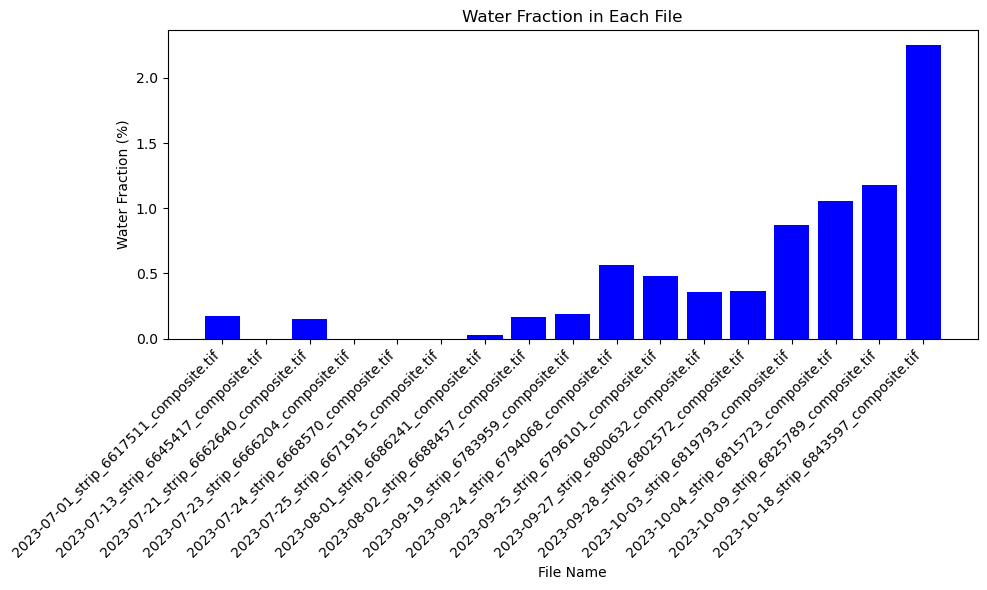

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(file_names, water_fractions, color='blue')
plt.xlabel('File Name')
plt.ylabel('Water Fraction (%)')
plt.title('Water Fraction in Each File')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()